In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime

In [2]:
tickers = ['PG','^GSPC']
tickers_data = pd.DataFrame()
startdate = datetime(2013,7,1)
enddate = datetime(2023,7,1)
for i in tickers:
    tickers_data[i] = pdr.get_data_yahoo(i,start = startdate, end = enddate)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


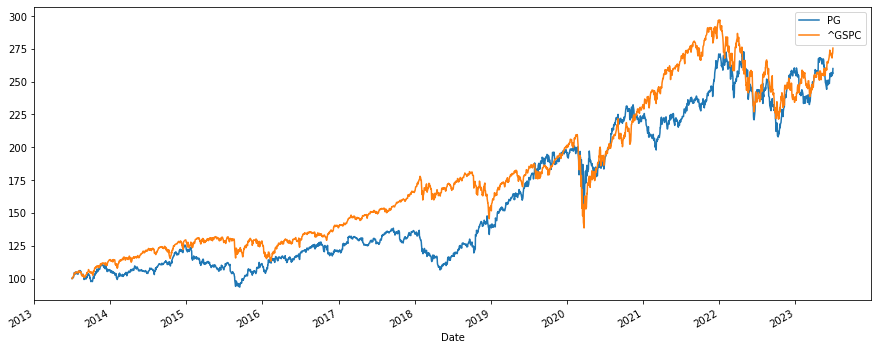

In [3]:
# Normalising and plotting the data:
((tickers_data/tickers_data.iloc[0])*100).plot(figsize=(15,6))
plt.show()

In [4]:
log_returns = np.log(tickers_data/tickers_data.shift(1))
log_returns.head()

,PG,^GSPC
Date,,
2013-07-01,NaN,NaN
2013-07-02,0.005369,-0.000545
2013-07-03,0.001656,0.000824
2013-07-05,-0.002932,0.010150
2013-07-08,0.005347,0.005238


In [5]:
num_assets = len(tickers)
weights = np.random.random(num_assets)
weights /= np.sum(weights) # To make the sum equal to 1
weights

array([0.44122025, 0.55877975])

### Performing this operation to understand what should be the weight of each stock, i.e. 1% of stock A and 99% of Stock B, and similarly we will compute 1000 combinations of it.

In [6]:
portfolio_return = []
portfolio_volatility = []

for i in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights) # To make the sum equal to 1
    portfolio_return.append(np.sum(weights * log_returns.mean()) * 250) # Expected portfolio return
    portfolio_volatility.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))) # Expected portfolio Volatility
    
portfolio_return = np.array(portfolio_return) # converting the list to np array
portfolio_volatility = np.array(portfolio_volatility)

# portfolio_return,portfolio_volatility

In [7]:
portfolios = pd.DataFrame({'Return': portfolio_return, 'Volatility': portfolio_volatility})
portfolios.head()

,Return,Volatility
0,0.096082,0.167039
1,0.098163,0.158223
2,0.098198,0.158267
3,0.099709,0.166065
4,0.098153,0.158213


<AxesSubplot:xlabel='Expected Volatility', ylabel='Expected Return'>

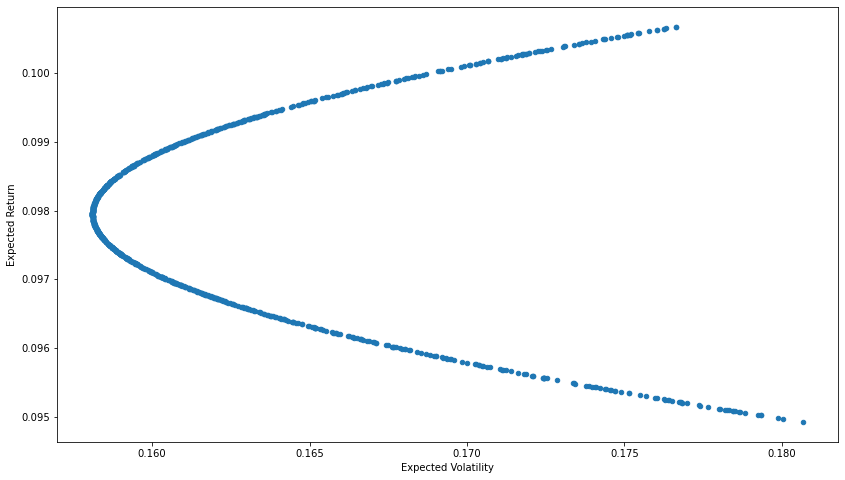

In [8]:
portfolios.plot(x = 'Volatility', y = 'Return', kind = 'scatter',
                figsize = (14,8), xlabel = 'Expected Volatility', ylabel = 'Expected Return')

## Calculating the Beta:

TODO: Create a defination so you can add more number of stocks and calculate the Beta together via iteration.

In [9]:
sec_returns = np.log(tickers_data/tickers_data.shift(1))
sec_returns.head()

,PG,^GSPC
Date,,
2013-07-01,NaN,NaN
2013-07-02,0.005369,-0.000545
2013-07-03,0.001656,0.000824
2013-07-05,-0.002932,0.010150
2013-07-08,0.005347,0.005238


In [10]:
cov = sec_returns.cov() * 250
cov

,PG,^GSPC
PG,0.032711,0.018064
^GSPC,0.018064,0.031227


In [11]:
cov_with_market = cov.iloc[0,1]
cov_with_market

0.018063764118685127

In [12]:
market_var = sec_returns['^GSPC'].var() * 250
market_var

0.031226764406733436

In [13]:
pg_beta = cov_with_market / market_var
pg_beta

0.5784705672160524

## Calculating the expected return of P&G (CAPM):

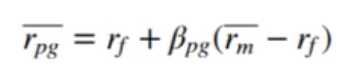

Rf: is risk free, but in real world there is nothing known as risk free, so we take the yield% of 10 year gov. bonds.

r_f = 0.025

pct_change() method returns a DataFrame with the percentage difference between the values for each row and, by default, the previous row

In [25]:
r_m = tickers_data['^GSPC'].pct_change().mean() * 250
r_m
# Risk Premium

0.11627260667102797

In [26]:
r_f = 0.025
r_m - r_f

0.09127260667102796

In [27]:
pg_er = r_f + pg_beta * (r_m - r_f)
pg_er

0.0777985165522772

i.e.  we can expect the retutn of 7.8% by buying the P&G stock.

## SHARPE RATIO:
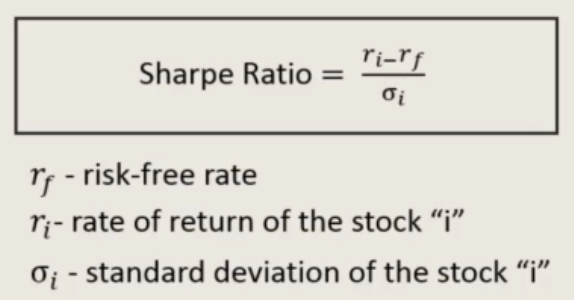